In [1]:
# lib
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# technical analysis
import ta

# Pyfolio
import pyfolio as pf

C:\Users\JHCho\anaconda3\envs\py37\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


## data: 5 minutes data

In [2]:
df_ = pd.read_csv('C:ethusd5min.csv')
df = df_.set_index('timestamp')
df.index = pd.to_datetime(df.index)
df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2020-10-01 00:00:00,359.83,361.24,359.76,360.68,5370.31418,1601510699999,1.935369e+06,1638,2677.81587,9.649148e+05,0
2020-10-01 00:05:00,360.63,361.27,360.40,360.41,1550.01805,1601510999999,5.591034e+05,867,503.23274,1.815330e+05,0
2020-10-01 00:10:00,360.40,360.50,359.81,360.26,3260.40922,1601511299999,1.174067e+06,1247,946.33216,3.407448e+05,0
2020-10-01 00:15:00,360.27,360.64,360.00,360.38,1808.97968,1601511599999,6.519780e+05,885,821.23793,2.959724e+05,0
2020-10-01 00:20:00,360.38,360.76,360.14,360.61,1330.17020,1601511899999,4.795400e+05,631,427.83817,1.542573e+05,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-17 15:00:00,2384.01,2386.34,2368.00,2369.47,4876.99848,1618671899999,1.158924e+07,7698,2312.84492,5.497185e+06,0
2021-04-17 15:05:00,2369.91,2374.87,2366.38,2372.35,4795.76812,1618672199999,1.137197e+07,6170,2784.53741,6.602160e+06,0
2021-04-17 15:10:00,2372.34,2376.29,2368.75,2370.91,2785.56017,1618672499999,6.606236e+06,3753,1763.91799,4.183089e+06,0


In [3]:
df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2020-10-01 00:00:00,359.83,361.24,359.76,360.68,5370.31418,1601510699999,1.935369e+06,1638,2677.81587,9.649148e+05,0
2020-10-01 00:05:00,360.63,361.27,360.40,360.41,1550.01805,1601510999999,5.591034e+05,867,503.23274,1.815330e+05,0
2020-10-01 00:10:00,360.40,360.50,359.81,360.26,3260.40922,1601511299999,1.174067e+06,1247,946.33216,3.407448e+05,0
2020-10-01 00:15:00,360.27,360.64,360.00,360.38,1808.97968,1601511599999,6.519780e+05,885,821.23793,2.959724e+05,0
2020-10-01 00:20:00,360.38,360.76,360.14,360.61,1330.17020,1601511899999,4.795400e+05,631,427.83817,1.542573e+05,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-17 15:00:00,2384.01,2386.34,2368.00,2369.47,4876.99848,1618671899999,1.158924e+07,7698,2312.84492,5.497185e+06,0
2021-04-17 15:05:00,2369.91,2374.87,2366.38,2372.35,4795.76812,1618672199999,1.137197e+07,6170,2784.53741,6.602160e+06,0
2021-04-17 15:10:00,2372.34,2376.29,2368.75,2370.91,2785.56017,1618672499999,6.606236e+06,3753,1763.91799,4.183089e+06,0


In [4]:
close = pd.to_numeric(df.close)

## Simple Moving Average

- fast sma, slow sma crossover strategy

**What will be the best rolling window for fast and slow sma?**

i prefer the slow sma following 4 times longer window than the fast sma

In [30]:
fsma = ta.trend.sma_indicator(close,5)
ssma = ta.trend.sma_indicator(close,20)

In [31]:
diff = fsma - ssma
a = np.sign(diff).diff()*(-.5)
crossover = a.loc[a!=0].shift(1).dropna()

In [32]:
crossover

timestamp
2020-10-01 04:05:00    1.0
2020-10-01 04:50:00   -1.0
2020-10-01 06:05:00    1.0
2020-10-01 10:00:00   -1.0
2020-10-01 11:25:00    1.0
                      ... 
2021-04-17 12:40:00   -1.0
2021-04-17 12:50:00    1.0
2021-04-17 13:10:00   -1.0
2021-04-17 13:50:00    1.0
2021-04-17 14:35:00   -1.0
Length: 3813, dtype: float64

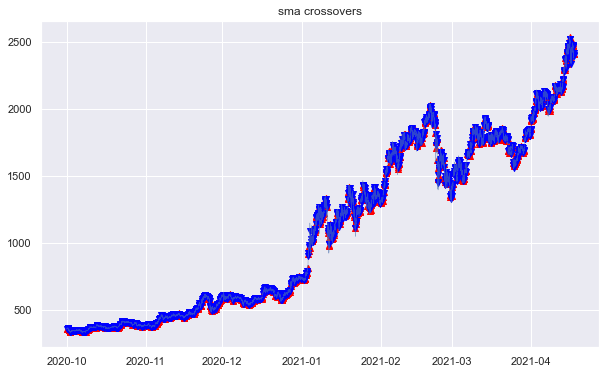

In [33]:
sc = crossover
title =  'sma crossovers'

long = close.loc[sc.loc[sc==1].index]
short = close.loc[sc.loc[sc==-1].index]

plt.figure(figsize=(10,6))
plt.plot(close, linewidth=0.5,alpha=0.6)
plt.scatter(long.index, long, c='red',marker='^', alpha=1)
plt.scatter(short.index, short, c='blue',marker='v', alpha=1)

plt.title(title)
plt.show()

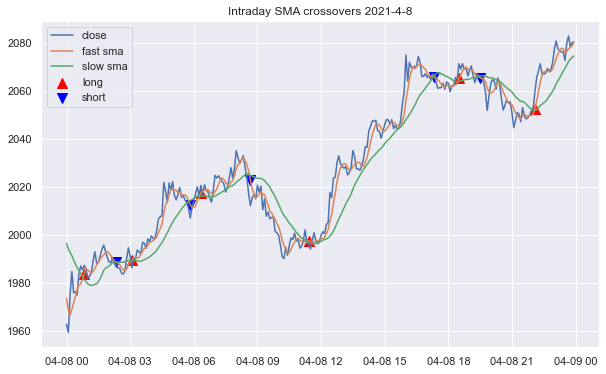

In [34]:
# Intraday
sc = crossover
title =  'Intraday SMA crossovers'

long = fsma.loc[sc.loc[sc==1].index]
short = fsma.loc[sc.loc[sc==-1].index]

day = ' 2021-4-8'
plt.figure(figsize=(10,6))
s = 100
plt.scatter(long.loc[day].index, long.loc[day],s=s, c='red',marker='^', alpha=1)
plt.scatter(short.loc[day].index, short.loc[day],s=s, c='blue',marker='v', alpha=1)
plt.plot(close.loc[day])
plt.plot(fsma.loc[day])
plt.plot(ssma.loc[day])
plt.title(title + day)
plt.legend(['close','fast sma','slow sma','long','short'])
plt.show()

## Backtest

Trading
- Only long  position
- Enter the long position when the long signal comes, exit the position when the short signal comes.
- Ignore when long or short signal comes in a row.

In [71]:
mult = (crossover+1)/2

In [78]:
rets = (close.loc[crossover.index].pct_change().shift(-1))*mult
rets = rets.loc[rets!=0].dropna()

In [79]:
rets

timestamp
2020-10-01 04:05:00   -0.001928
2020-10-01 06:05:00    0.011689
2020-10-01 11:25:00    0.002864
2020-10-01 12:35:00   -0.001360
2020-10-01 15:20:00   -0.010654
                         ...   
2021-04-17 08:00:00   -0.002311
2021-04-17 08:55:00   -0.002921
2021-04-17 12:35:00    0.000813
2021-04-17 12:50:00   -0.004130
2021-04-17 13:50:00   -0.006350
Length: 1906, dtype: float64

In [80]:
rets.describe()

count    1906.000000
mean        0.000656
std         0.012077
min        -0.042878
25%        -0.004769
50%        -0.001931
75%         0.002652
max         0.122052
dtype: float64

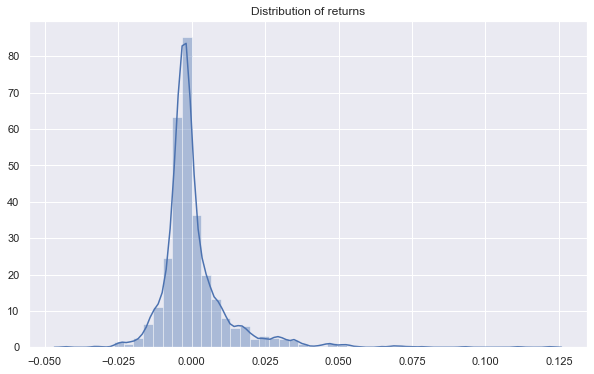

In [81]:
plt.figure(figsize=(10,6))
sns.distplot(rets)
plt.title('Distribution of returns')
plt.show()

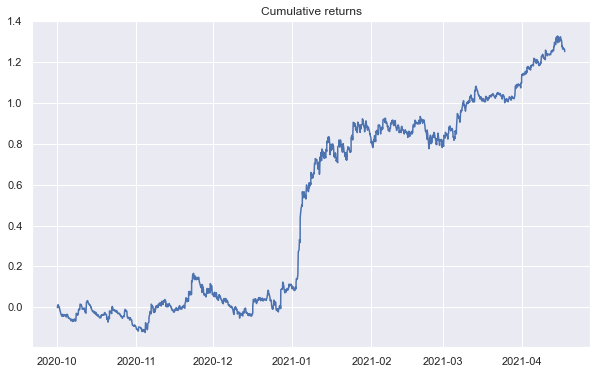

In [82]:
plt.figure(figsize=(10,6))
plt.plot(rets.cumsum())
plt.title('Cumulative returns')
plt.show()

In [70]:
SR = rets.mean()/rets.std()
print('Total Sharpe Ratio: ',SR)

Total Sharpe Ratio:  0.042267881946318496
